In [1]:
import pandas

In [2]:
data = pandas.read_csv('../data/exercises/titanic.csv', index_col=0)
data.shape

(1309, 11)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.count()

Survived     891
Pclass      1309
Name        1309
Sex         1309
Age         1046
SibSp       1309
Parch       1309
Ticket      1309
Fare        1308
Cabin        295
Embarked    1307
dtype: int64

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [7]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
embarked_grouped = data.groupby('Embarked')

In [9]:
embarked_grouped.groups.keys()

dict_keys(['C', 'Q', 'S'])

In [10]:
for i in embarked_grouped.groups.keys():
    print (i)

C
Q
S


In [11]:
for i in embarked_grouped.groups.keys():
    print (i)
    print (embarked_grouped.get_group(i)['Sex'].value_counts())

C
male      157
female    113
Name: Sex, dtype: int64
Q
male      63
female    60
Name: Sex, dtype: int64
S
male      623
female    291
Name: Sex, dtype: int64


In [12]:
gender_port = {}
for i in embarked_grouped.groups.keys():
    gender_port[i] = embarked_grouped.get_group(i)['Sex'].value_counts()
gender_port

{'C': male      157
 female    113
 Name: Sex, dtype: int64, 'Q': male      63
 female    60
 Name: Sex, dtype: int64, 'S': male      623
 female    291
 Name: Sex, dtype: int64}

In [13]:
gender_port = {}
for i in embarked_grouped.groups.keys():
    gender_port[i] = embarked_grouped.get_group(i)['Sex'].value_counts().to_dict()
gender_port

{'C': {'male': 157, 'female': 113},
 'Q': {'male': 63, 'female': 60},
 'S': {'male': 623, 'female': 291}}

In [14]:
gender_port = pandas.DataFrame(gender_port)

In [15]:
gender_port

,C,Q,S
female,113,60,291
male,157,63,623


In [16]:
gender_port = gender_port.T
gender_port

,female,male
C,113,157
Q,60,63
S,291,623


In [17]:
gender_port['ratio'] = gender_port['male']/gender_port['female']

In [18]:
gender_port

,female,male,ratio
C,113,157,1.389381
Q,60,63,1.050000
S,291,623,2.140893


In [19]:
embarked_grouped.mean()['Fare']

Embarked
C    62.336267
Q    12.409012
S    27.418824
Name: Fare, dtype: float64

In [20]:
data.groupby('Sex').mean()['Fare']

Sex
female    46.198097
male      26.154601
Name: Fare, dtype: float64

In [21]:
embarked_grouped.get_group('S').groupby('Sex').mean()['Fare']

Sex
female    39.339305
male      21.841878
Name: Fare, dtype: float64

In [22]:
import seaborn

In [23]:
seaborn.set(style="whitegrid")

In [24]:
gender_port = gender_port.drop(columns=['ratio'])

In [25]:
gender_port

,female,male
C,113,157
Q,60,63
S,291,623


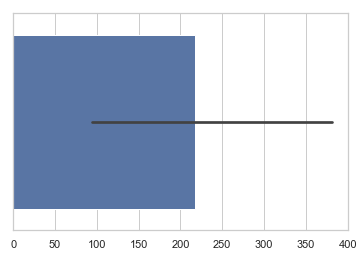

In [26]:
seaborn.barplot(gender_port)

In [27]:
gender_port.melt()

,variable,value
0,female,113
1,female,60
2,female,291
3,male,157
4,male,63
5,male,623


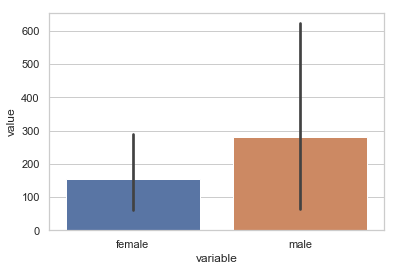

In [28]:
seaborn.barplot(x='variable', y='value', data=gender_port.melt())

In [29]:
%config InlineBackend.figure_format = 'retina'

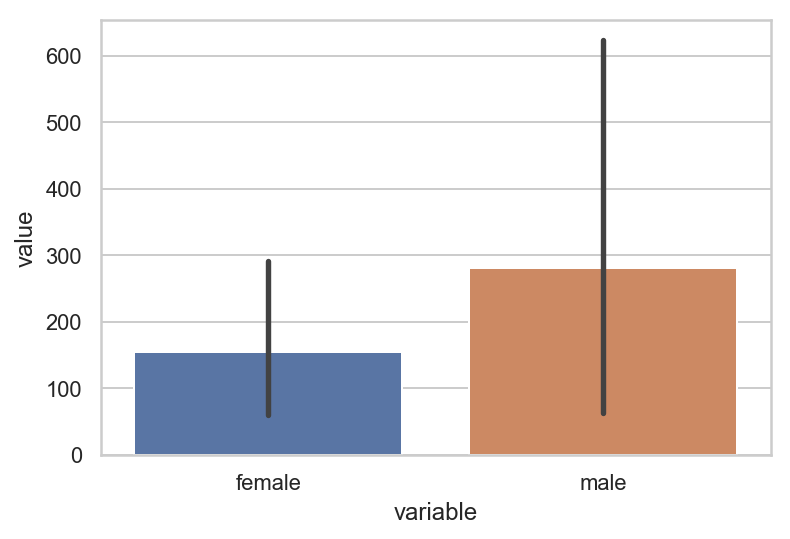

In [30]:
seaborn.barplot(x='variable', y='value', data=gender_port.melt())

In [31]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


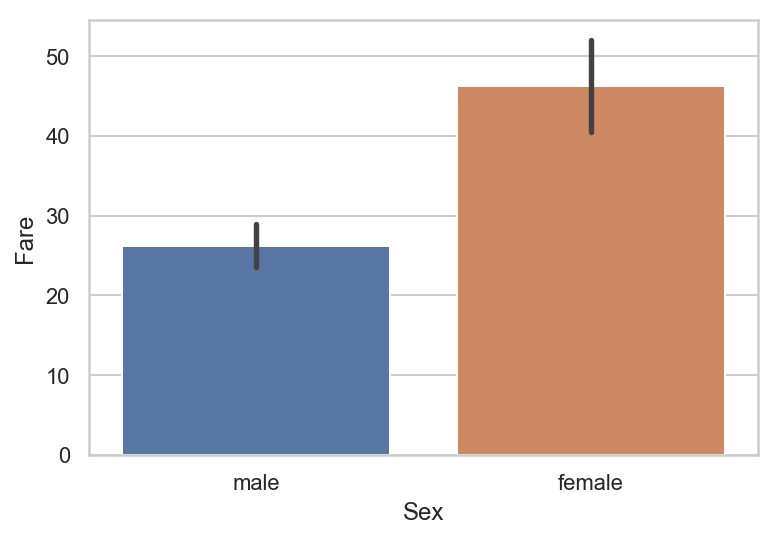

In [32]:
seaborn.barplot(x='Sex', y='Fare', data=data)

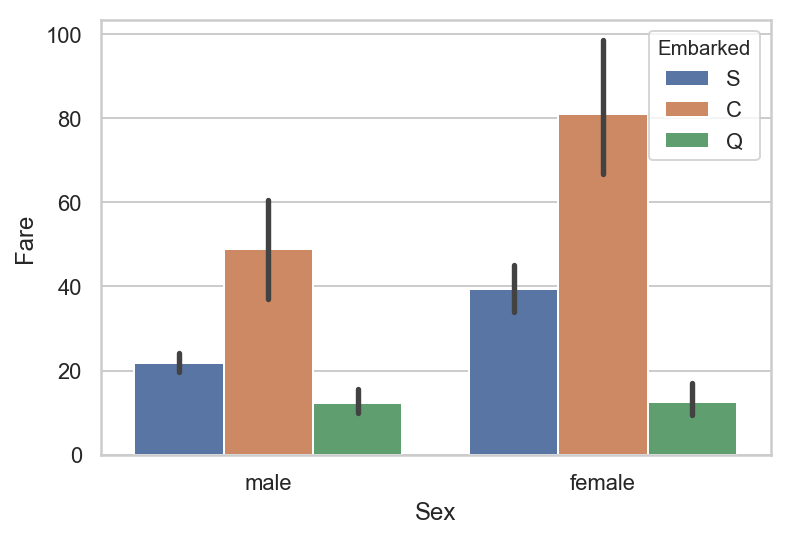

In [33]:
seaborn.barplot(x='Sex', y='Fare', hue='Embarked', data=data)

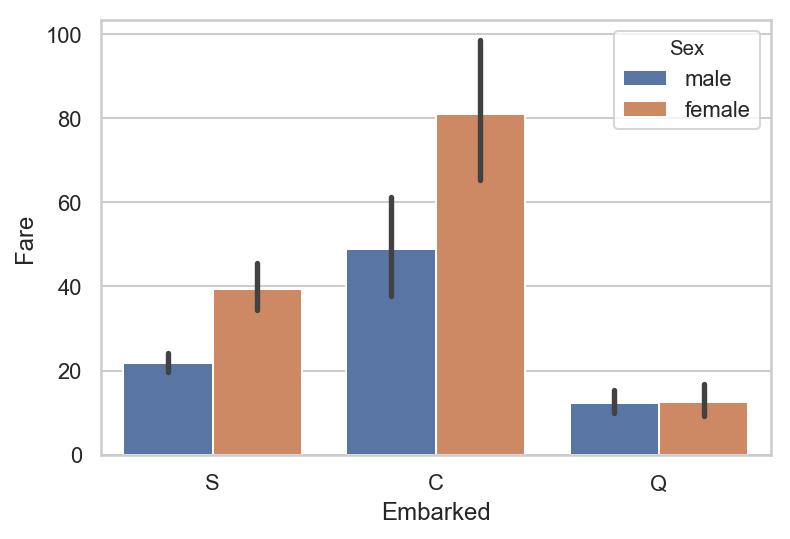

In [34]:
seaborn.barplot(x='Embarked', y='Fare', hue='Sex', data=data)

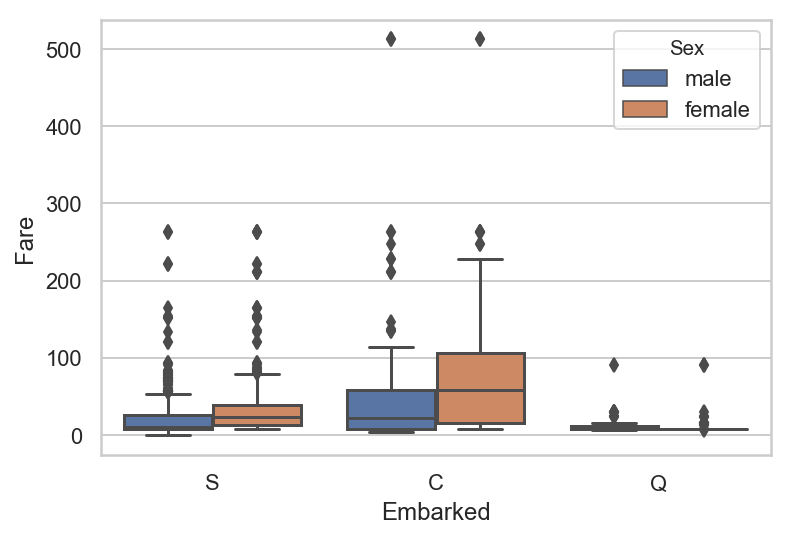

In [35]:
seaborn.boxplot(x='Embarked', y='Fare', hue='Sex', data=data)

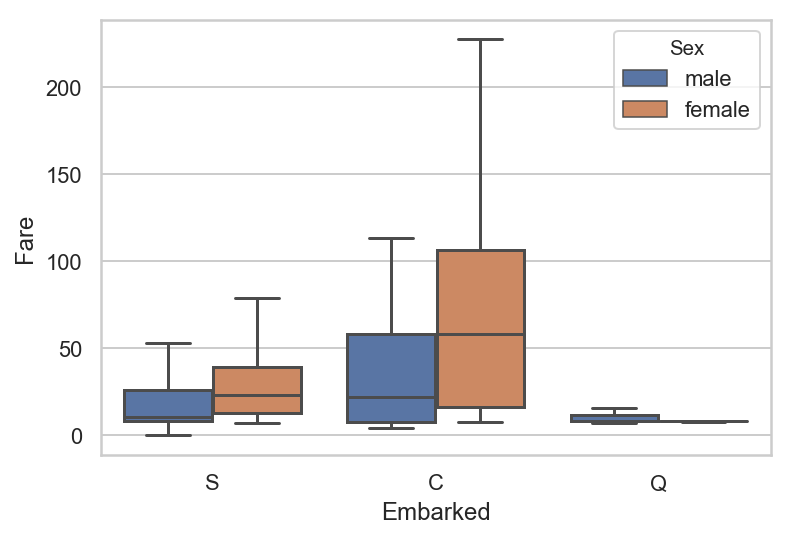

In [36]:
seaborn.boxplot(x='Embarked', y='Fare', hue='Sex', data=data, sym='')

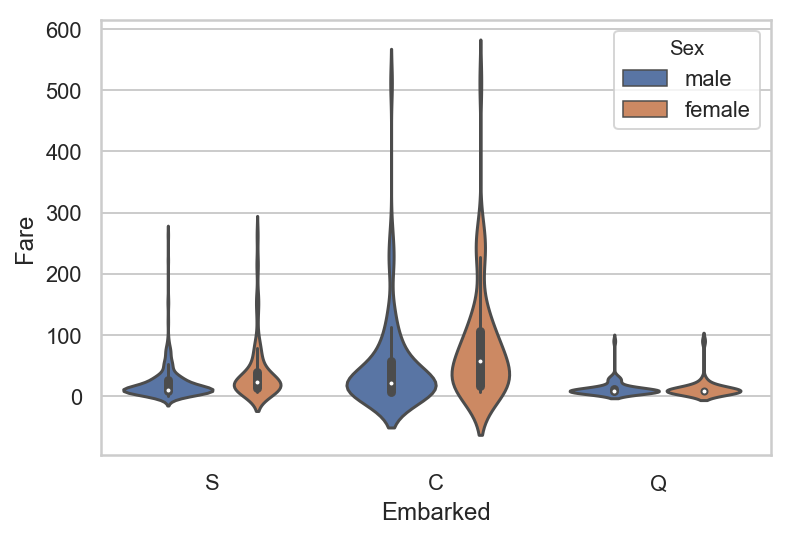

In [37]:
seaborn.violinplot(x='Embarked', y='Fare', hue='Sex', data=data)

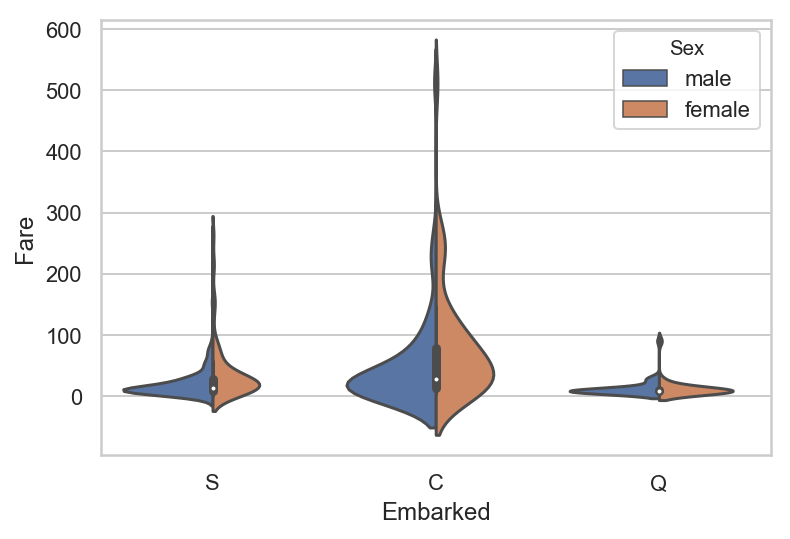

In [38]:
seaborn.violinplot(x='Embarked', y='Fare', hue='Sex', data=data, split=True)

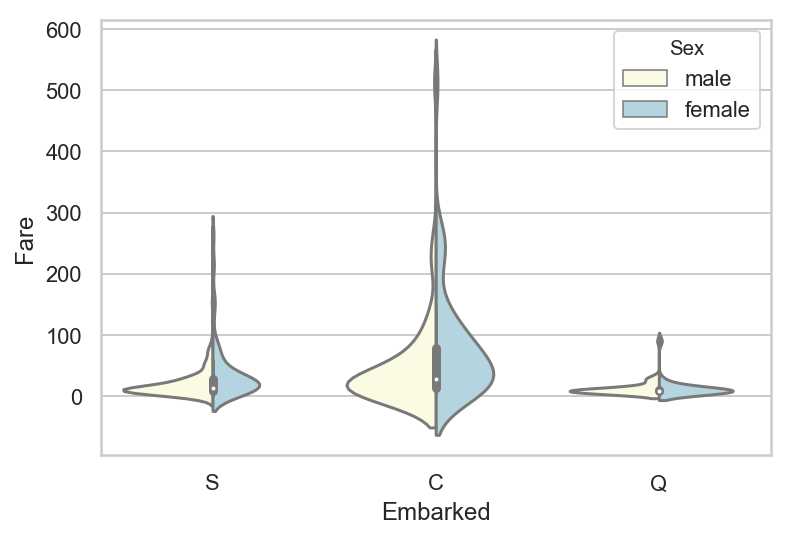

In [39]:
seaborn.violinplot(x='Embarked', y='Fare', hue='Sex', data=data, split=True,
                   palette={"male": "lightyellow", "female": "lightblue"})

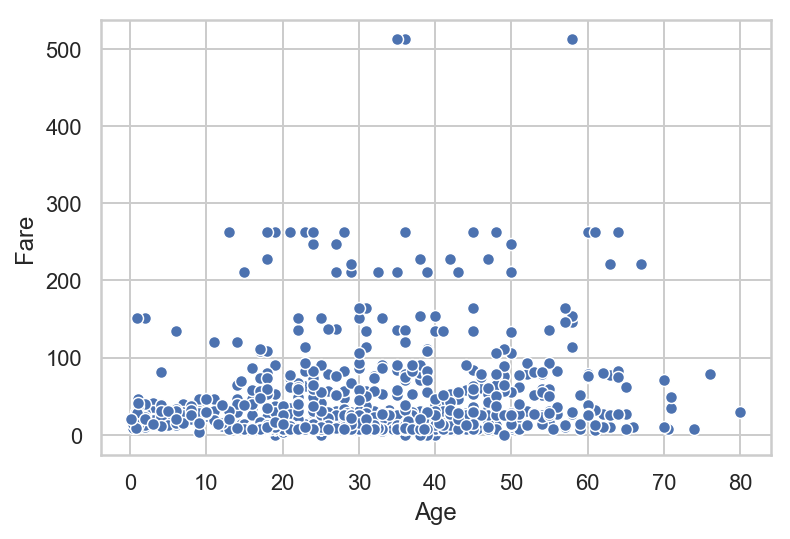

In [40]:
seaborn.scatterplot(x='Age', y='Fare', data=data)

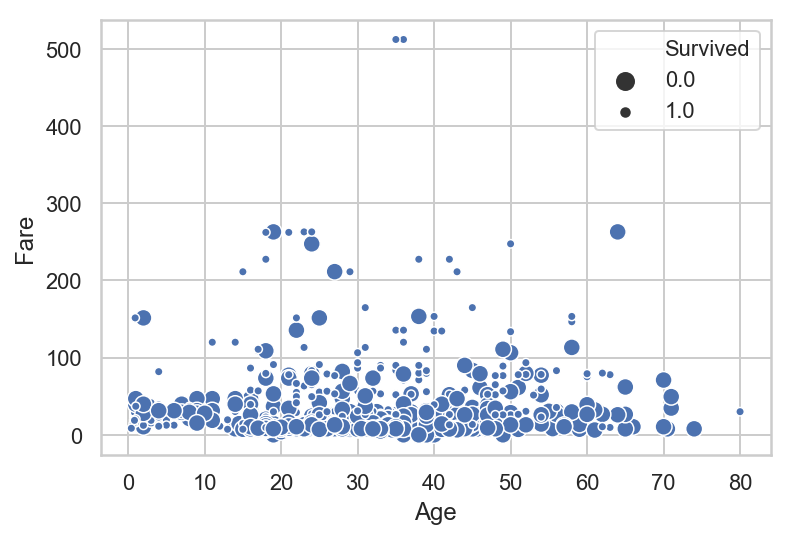

In [41]:
seaborn.scatterplot(x='Age', y='Fare', size='Survived', data=data)

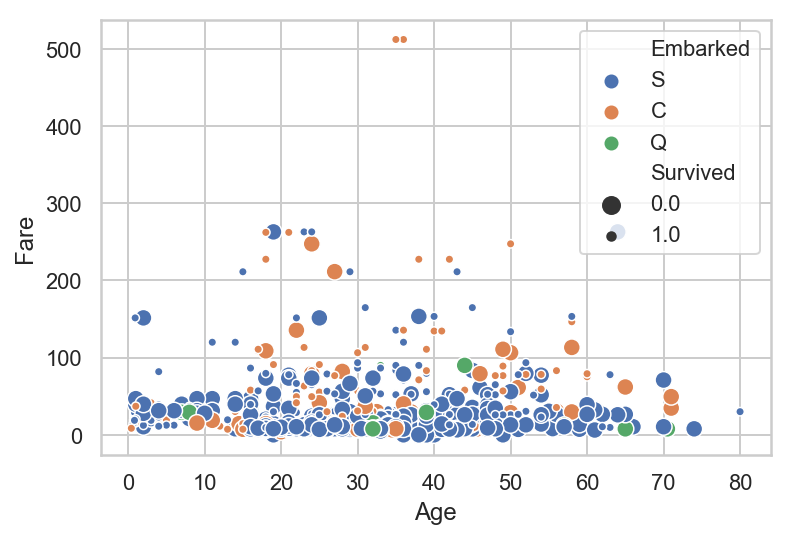

In [42]:
seaborn.scatterplot(x='Age', y='Fare', size='Survived',
                    hue='Embarked', data=data)

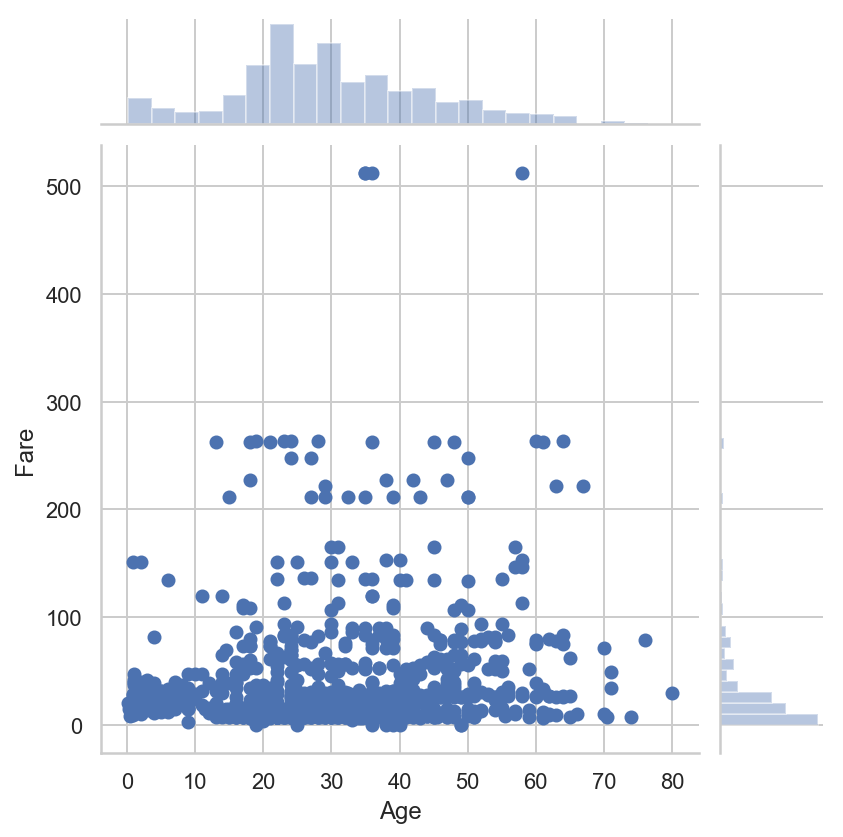

In [43]:
seaborn.jointplot(x='Age', y='Fare', data=data)

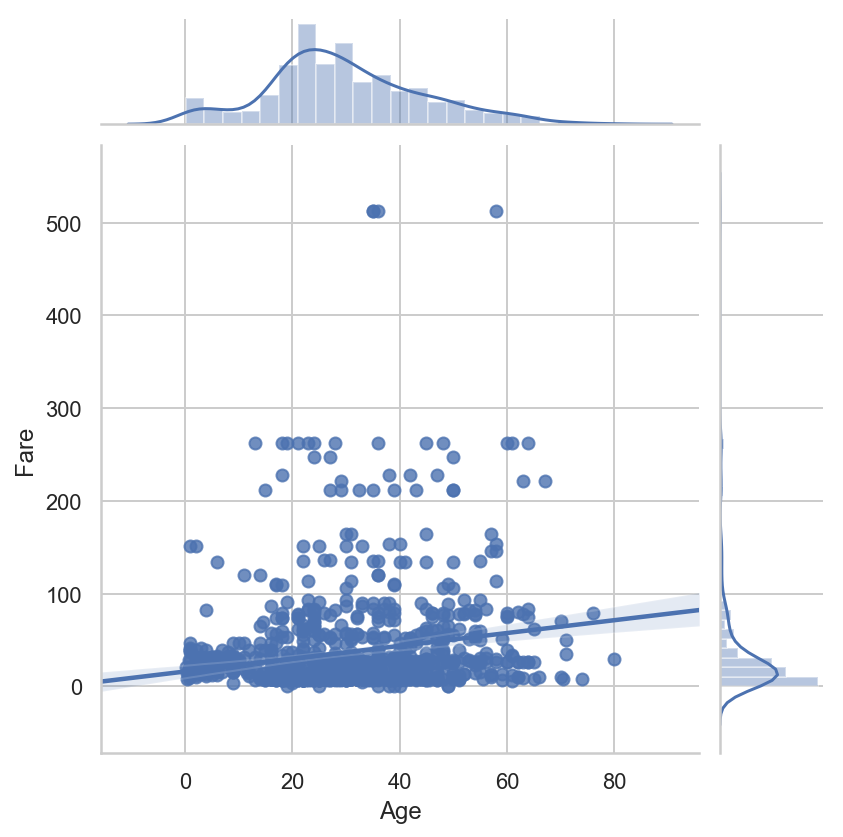

In [44]:
seaborn.jointplot(x='Age', y='Fare', kind='reg', data=data)

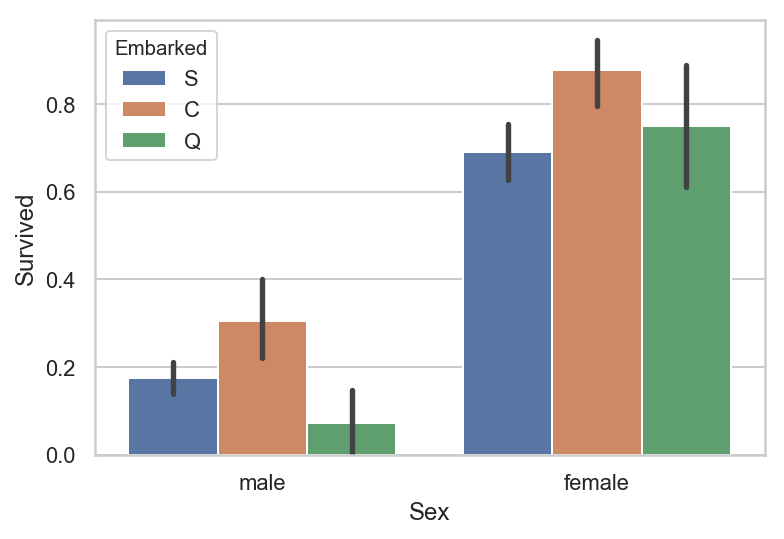

In [45]:
seaborn.barplot(x='Sex', y='Survived', hue='Embarked', data=data)